<a href="https://colab.research.google.com/github/lamortizme/Instrumentos/blob/main/PuntoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import numpy as np
from scipy.signal import fftconvolve
# se carga las dos imagenes
img = cv2.imread('cgris.jpg',0)
img20 = cv2.imread('c_clue(1).jpg',0)
img2 = cv2.flip(img20,1)
U1=np.array(img,dtype='uint8')
U2=np.array(img2,dtype='uint8')



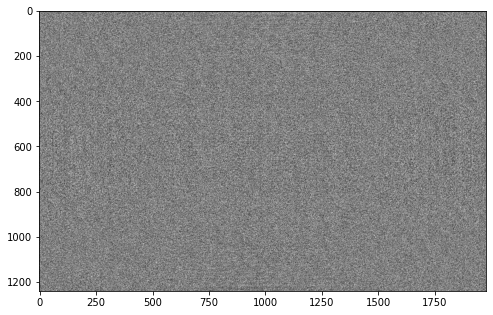

In [ ]:
#se refleja la imagen img20
#img2 = cv2.flip(img20,1)

#se aplica DTF a img y img2
dft=np.fft.fft2(img)
dft_s= np.fft.fftshift(dft)
dft2=np.fft.fft2(img2)
dft_s2= np.fft.fftshift(dft2)

#ms y ms2 muestran DTF 
#ms = 20* np.log(cv2.magnitude(dft_s[:,0], dft_s[:,1]))
#ms2 = 20* np.log(cv2.magnitude(dft_s2[:,0], dft_s[:,1]))

# se multiplica las DTF de cada una de las imagenes y se obtiene la DTF inversa de ese resoltado, a fin de encontrar la convoluci�n entre las dos imagenes 
dH=dft_s
#magnitud de dH para poder visualizarla en el espacio de las frecuencias


i= np.fft.ifft(dH)
UU=abs(i)
#
a= abs((img_b)**2)
#se crean las diferentes figuras(los elementos comentados son para elegir una sola de las figuras)
fig=plt.figure(figsize=(8,8))
plt.imshow(np.angle(np.fft.fft2(img)),cmap='gray')
plt.show()


In [ ]:
print(img)

[[155 186 197 ...  78  74  91]
 [184 166 133 ... 105  88  88]
 [112  73  81 ... 138 130 122]
 ...
 [208 206 209 ...  68 109  76]
 [210 203 207 ...  30  86  76]
 [213 197 194 ...  13  55  59]]


# Sección nueva

In [ ]:
W=normxcorr2(img2, img, mode="full")


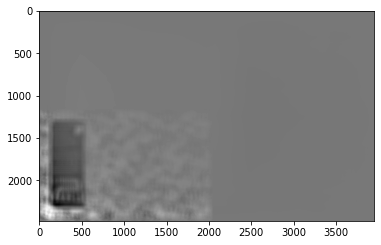

In [ ]:
plt.imshow(W,cmap='gray')

In [ ]:
def normxcorr2(template, image, mode="full"):
    """
    Input arrays should be floating point numbers.
    :param template: N-D array, of template or filter you are using for cross-correlation.
    Must be less or equal dimensions to image.
    Length of each dimension must be less than length of image.
    :param image: N-D array
    :param mode: Options, "full", "valid", "same"
    full (Default): The output of fftconvolve is the full discrete linear convolution of the inputs. 
    Output size will be image size + 1/2 template size in each dimension.
    valid: The output consists only of those elements that do not rely on the zero-padding.
    same: The output is the same size as image, centered with respect to the ‘full’ output.
    :return: N-D array of same dimensions as image. Size depends on mode parameter.
    """

    # If this happens, it is probably a mistake
    if np.ndim(template) > np.ndim(image) or \
            len([i for i in range(np.ndim(template)) if template.shape[i] > image.shape[i]]) > 0:
        print("normxcorr2: TEMPLATE larger than IMG. Arguments may be swapped.")

    template = template - np.mean(template)
    image = image - np.mean(image)

    a1 = np.ones(template.shape)
    # Faster to flip up down and left right then use fftconvolve instead of scipy's correlate
    ar = np.flipud(np.fliplr(template))
    out = fftconvolve(image, ar.conj(), mode=mode)
    
    image = fftconvolve(np.square(image), a1, mode=mode) - \
            np.square(fftconvolve(image, a1, mode=mode)) / (np.prod(template.shape))

    # Remove small machine precision errors after subtraction
    image[np.where(image < 0)] = 0

    template = np.sum(np.square(template))
    out = out / np.sqrt(image * template)

    # Remove any divisions by 0 or very close to 0
    out[np.where(np.logical_not(np.isfinite(out)))] = 0
    
    return out